# Introduction

In general, when working with **PyTorch** there are 4 steps to the training pipeline.

1. Preprare the data (convert to tensors, reshape etc)
2. Construct the model (usually as a class)
3. Define the loss and optimiser
4. Write a training loop

We will practice these steps on a simple **linear regression** problem.

<br>

**Libraries**

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn

# 1. Prepare the data

We use 'sklearn.datasets' to generate a **linear dataset** with **noise**.

In [2]:
# Generate data
X_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=0)
print(f'X shape {X_np.shape}')
print(f'y shape: {y_np.shape}')

X shape (100, 1)
y shape: (100,)


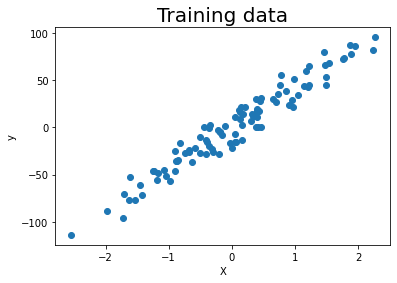

In [3]:
# Plot data
plt.figure(figsize=(6,4))
plt.scatter(X_np,y_np)
plt.title('Training data', fontsize=20)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
# Convert numpy arrays to tensors
X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
print(f'X shape {X.shape}')
print(f'y shape: {y.shape}')

X shape torch.Size([100, 1])
y shape: torch.Size([100])


In [5]:
# Reshape to column vector
y = y.view(-1,1)
print(f'y shape: {y.shape}')

y shape: torch.Size([100, 1])


# 2. Construct the model

When working with neural networks, we need to **inherit** the '**nn.Module**' and define a '**forward**' attribute. 

The inheritance part is done to get access to **attributes** like '**model.parameters()**', which are used in training.

In [6]:
# Model
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        
        # Define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    # Forward propagation
    def forward(self,x):
        return self.lin(x)

model = LinearRegression(1,1)

# 3. Define the loss and optimiser

The loss function is called from the '**torch.nn**' library and the optimiser from the '**torch.optim**' library. 

In [7]:
# Mean squared error loss
loss = nn.MSELoss()

# Stocastic gradient descent optimiser
optimiser = torch.optim.SGD(params=model.parameters(), lr=0.01)

# 4. Write a training loop

The most **important** thing to remember with PyTorch is that after every epoch, you have to **zero the gradients** (otherwise they will accumulate and explode).

In [8]:
# Number of epochs
n_iters = 300

# Loop
for epoch in range(n_iters):
    # Forward pass
    y_pred = model(X)
    L = loss(y_pred, y)
    
    # Backprop
    L.backward()
    
    # Update parameters
    optimiser.step()
    
    # Zero gradients
    optimiser.zero_grad()
    
    # Print loss
    if epoch % 50 == 0:
        print(f'Epoch {epoch}, loss {L.item():.3f}')

Epoch 0, loss 1889.515
Epoch 50, loss 340.540
Epoch 100, loss 143.475
Epoch 150, loss 118.023
Epoch 200, loss 114.685
Epoch 250, loss 114.241


# Evaluate

Finally, we plot the linear model over the data.

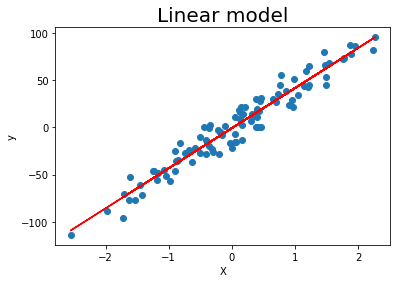

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(X_np,y_np)
plt.plot(X_np,model(X).detach().numpy(), color='red')
plt.title('Linear model', fontsize=20)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

**Check out my other PyTorch tutorials**

1. [PT1 - Linear Regression with PyTorch](https://www.kaggle.com/code/samuelcortinhas/pt1-linear-regression-with-pytorch/notebook)
2. [PT2 - Logistic Regression with PyTorch](https://www.kaggle.com/code/samuelcortinhas/pt2-logistic-regression-with-pytorch)
3. [PT3 - Neural Networks with PyTorch](https://www.kaggle.com/code/samuelcortinhas/pt3-neural-networks-with-pytorch)
4. [PT4 - CNNs with PyTorch](https://www.kaggle.com/samuelcortinhas/pt4-cnns-with-pytorch)
5. [PT5 - Save & load models with PyTorch](https://www.kaggle.com/samuelcortinhas/pt5-save-load-models-with-pytorch)